In [19]:
import pickle
# import matlab.engine
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
from scipy import signal
import pickle
import pandas as pd
# there were a lot of deprecation warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.signal import butter,filtfilt

In [20]:
# functions for easy work

def get_hour(hour: int):
    filename= 'Hour' + str(hour)
    with open(filename, 'rb') as data_file:
        data = pickle.load(data_file)
        print("data.size = " + str(data.size))
        data = np.array(data)
        print("data: " + str(data))
        return data
        
def plot_data(data: np.array, title: str):
    plt.figure(figsize=(13,4))
    plt.plot(data)
    plt.title(title, fontsize=20)
    plt.ylabel('Voltage', fontsize=16)
    plt.show()
    
def low_pass_filter(data: np.array, T=3600.0, fs=20000.0, cutoff=100, order=2):
    # Filter requirements.
    # T = 3600.0         # Sample Period, sec
    # fs = 20000.0       # sample rate, Hz
    # cutoff = 100      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
    # order = 2       # sin wave can be approx represented as quadratic
    nyq = 0.5 * fs  # Nyquist Frequency
    n = int(T * fs) # total number of samples
    
    # Filter the data,
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y
    
def downsample(data: np.array, sample_rate=20000.0, downsample_rate=250.0):
    # sample_rate = 20000.0
    # downsample_rate = 250.0
    downsample_factor = sample_rate / downsample_rate
    downsampled_data = scipy.signal.decimate(data, int(downsample_factor))
    return downsampled_data

def autocorrelation_order(data: np.array, log_range=7):
    autocorrelation = []
    correlation = np.corrcoef(data, data)[0,1]
    print(correlation)
    autocorrelation.append(correlation)
    for log_shift in range(7):
        shift = 10 ** log_shift
        correlation = np.corrcoef(data[:-shift], data[shift:])[0,1]
        print(shift)
        print(correlation)
        autocorrelation.append(correlation)
    plt.plot(autocorrelation)
    plt.title('Autocorrelation: change in order size shifts', fontsize=20)
    plt.show()
    
def my_autocorrelation(data: np.array, shifts_range, shifts_jump=1, shifts_lst=[]):
    autocorrelation = []
    correlation = np.corrcoef(data, data)[0,1]
    autocorrelation.append(correlation)
    if shifts_lst != []:
        shifts = shifts_lst
    else:
        shifts = range(1, shifts_range, shifts_jump)
    for shift in shifts:
        correlation = np.corrcoef(data[:-shift], data[shift:])[0,1]
        if shifts_lst != []:
            print("shift = " + str(shift))
            print("correlation = " + str(correlation))
        autocorrelation.append(correlation)
    return autocorrelation

def plot_statesmodel_autocorrelation(data: np.array):
    print(data.size)
    with mpl.rc_context():
        mpl.rc("figure", figsize=(13,4))
        plot_acf(data)
        
def data_presentation(data: np.array, start:tuple, end: tuple):
    plot_data(data, 'Raw Data - Wakefulness : %d:%d:%d-%d:%d:%d' % (start[0], start[1], start[2], end[0], end[1], end[2]))
    # low pass filter
    lpf_data = low_pass_filter(data)
    plot_data(lpf_data, 'Raw Data - Wakefulness : %d:%d:%d-%d:%d:%d, Butter Low Pass Filter' % (start[0], start[1], start[2], end[0], end[1], end[2]))
    # downsample
#     ds_data = downsample(data)
#     plot_data(ds_data, 'Raw Data - Wakefulness : %d:%d:%d-%d:%d:%d, downsampled to 250Hz' % (start[0], start[1], start[2], end[0], end[1], end[2]))

def minute_to_sample(minute: int, sample_rate=20000, start_sample=0):
    return second_to_sample(60*minute, start_sample)

def second_to_sample(second: int, sample_rate=20000, start_sample=0):
    return second * 20000 + start_sample

In [21]:
cd /home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Data/pickel_files

/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Data/pickel_files


data.size = 72000000
data: [-3.89999986 -2.92499989 -1.36499995 ... 67.46999753 61.03499776
 46.79999828]


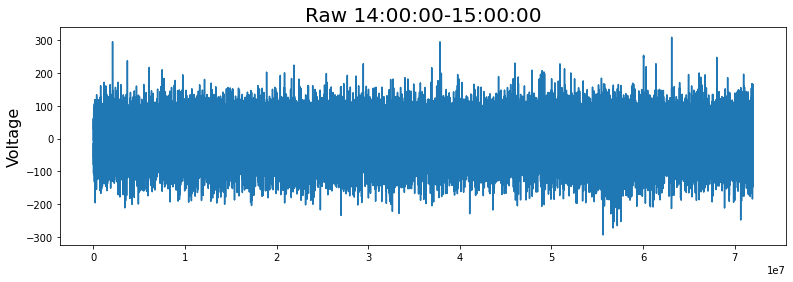

In [8]:
data14 = get_hour(14)
plot_data(data14, "Raw 14:00:00-15:00:00")

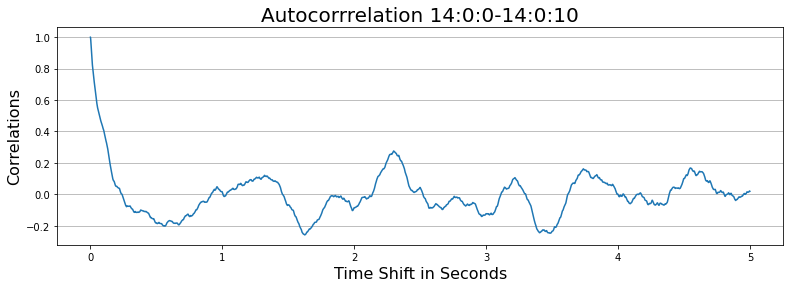

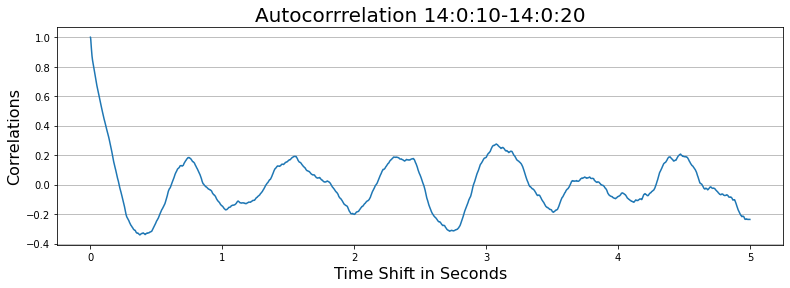

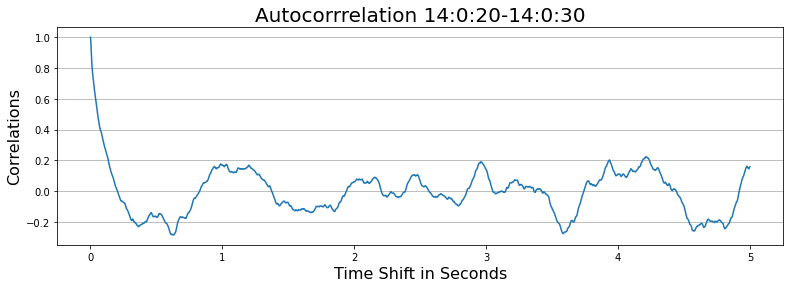

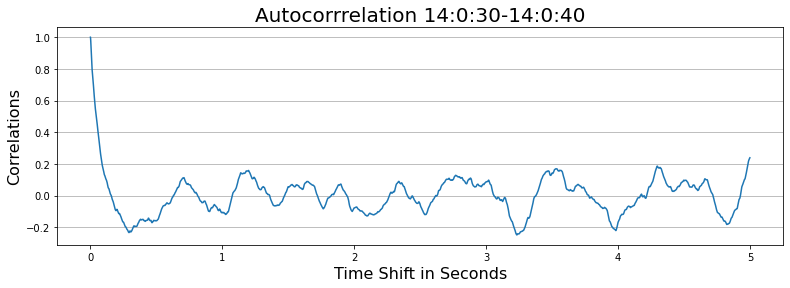

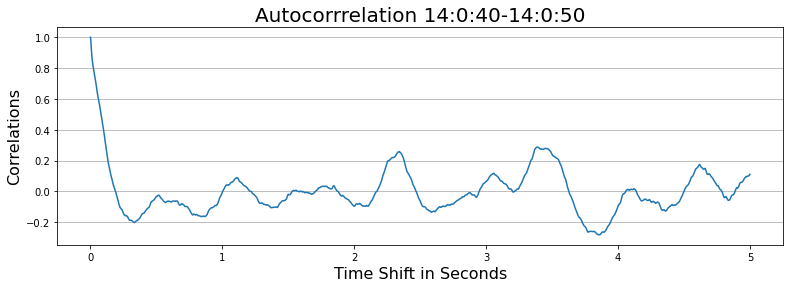

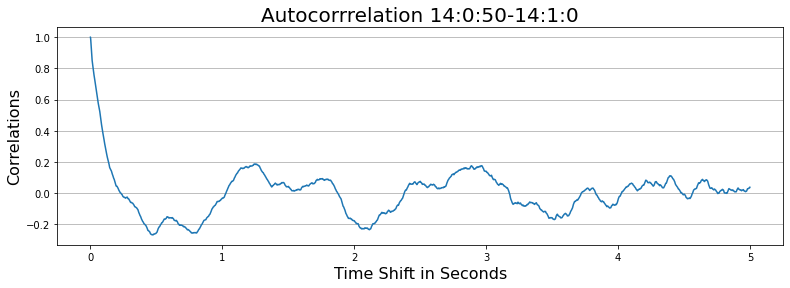

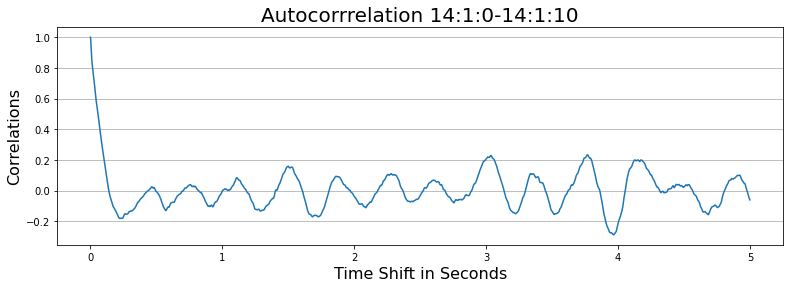

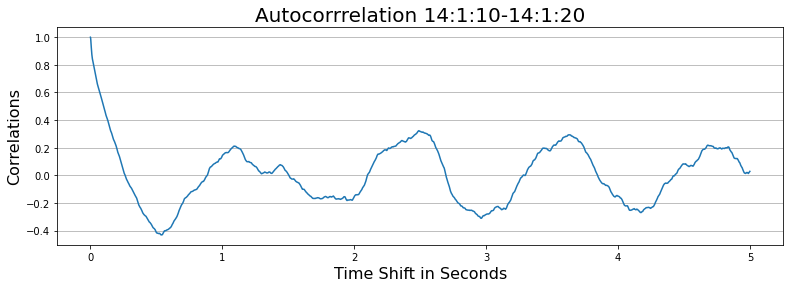

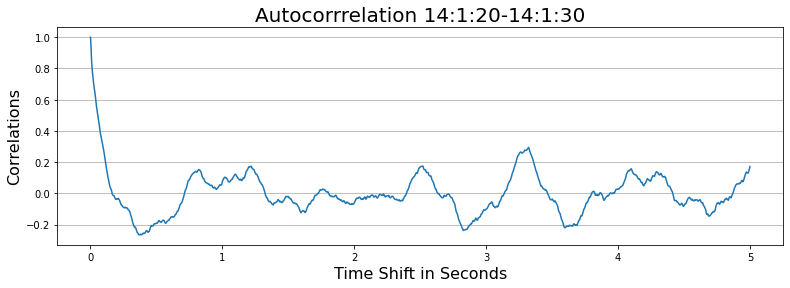

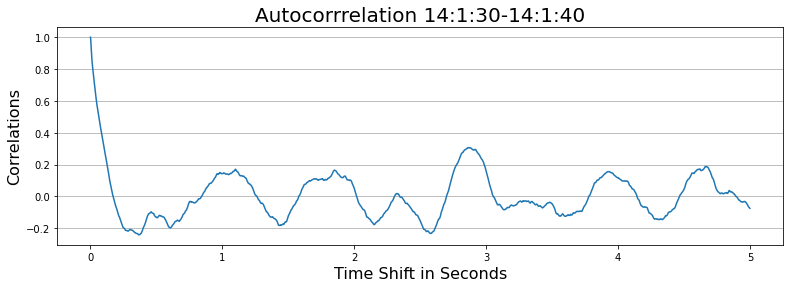

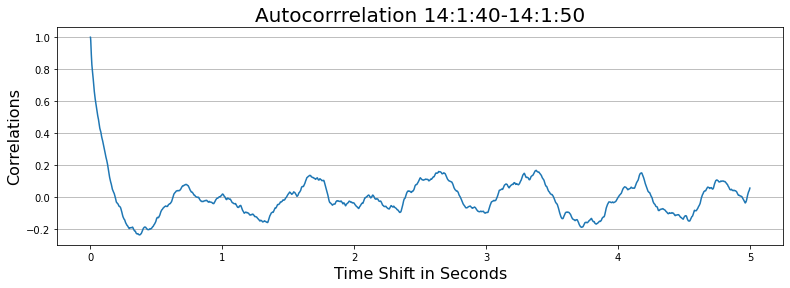

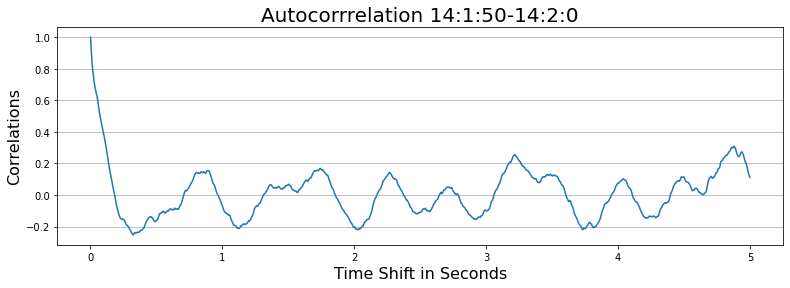

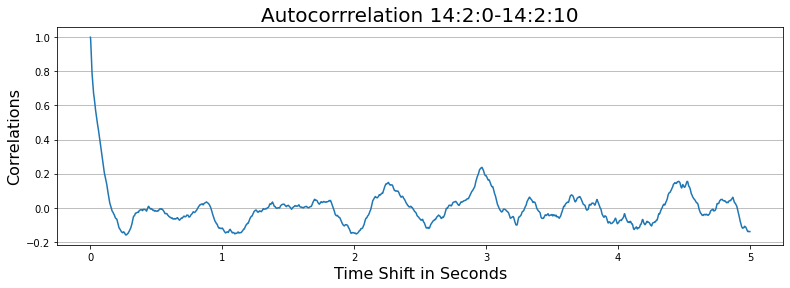

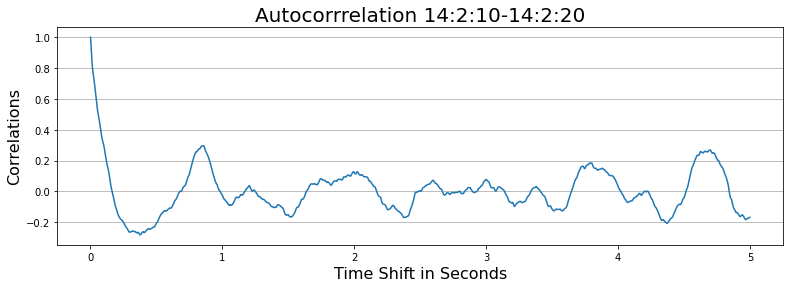

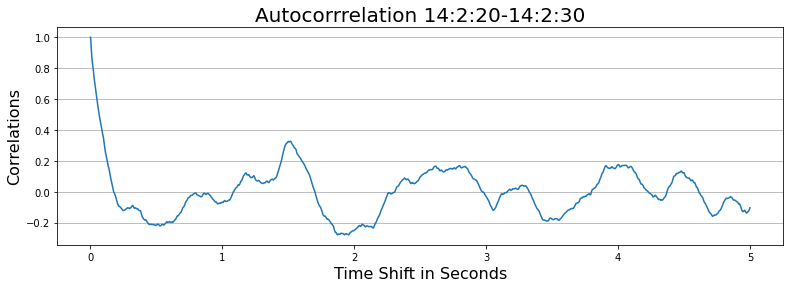

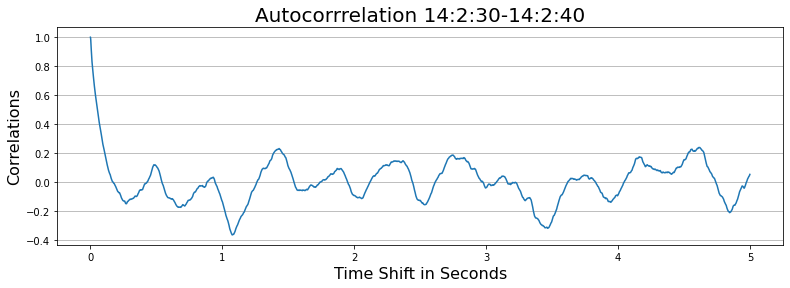

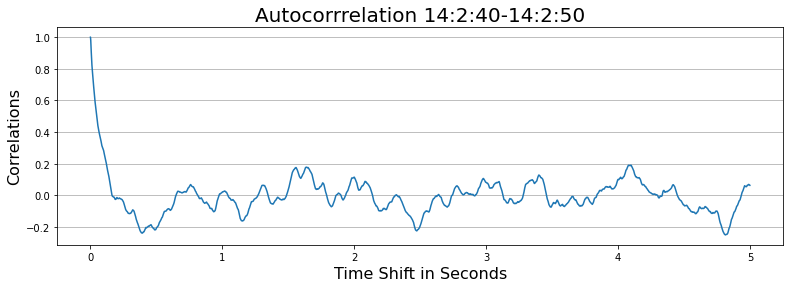

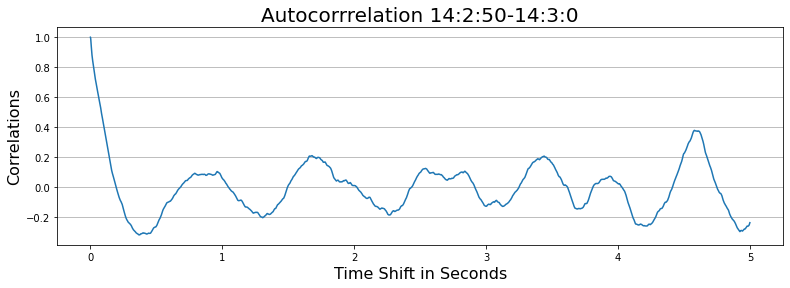

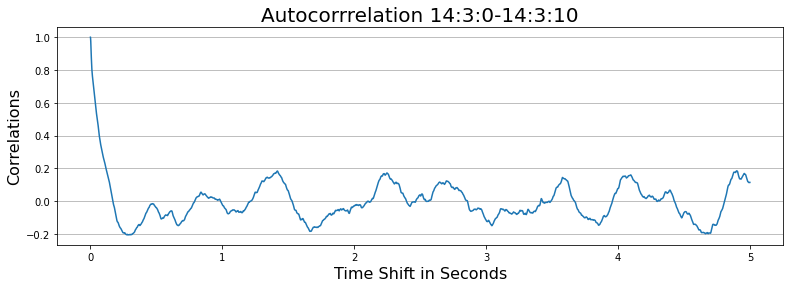

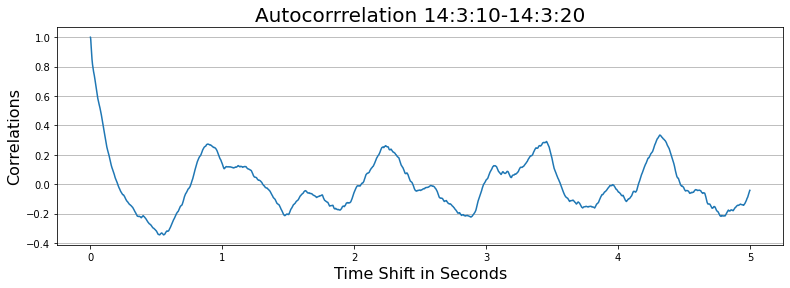

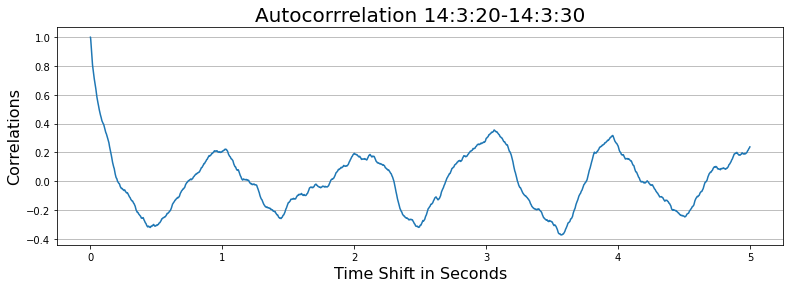

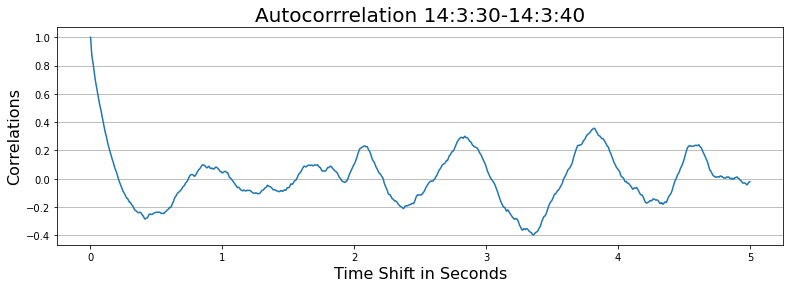

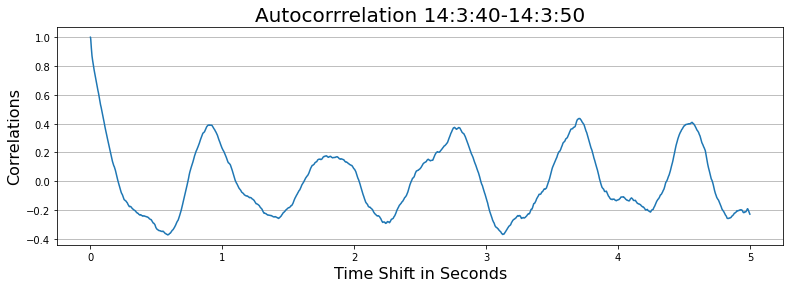

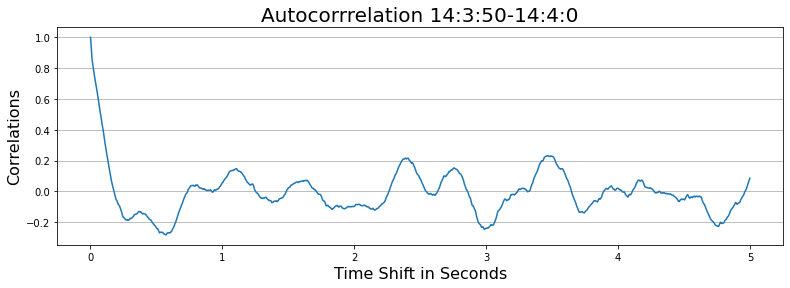

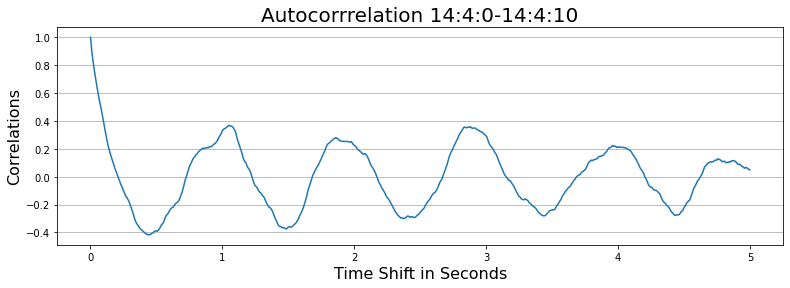

KeyboardInterrupt: 

In [33]:
for i in range(0, 600, 10):
    data = data14[second_to_sample(i):second_to_sample(i+10)]

#     plot_data(data, "RAW 14:00:%d-14:00:%d" % (i, i+10))

    data = low_pass_filter(data)
#     plot_data(data, "Low Pass Filter")

    # data = downsample(data)
    # plot_data(data, "downsample")

    autocorrelation = []
    # correlation = np.corrcoef(data, data)[0,1]
    # autocorrelation.append(correlation)
    shifts = [j for j in range(1, 100000, 10)]
    for shift in shifts:
#         print(shift)
        correlation = np.corrcoef(data[:-shift], data[shift:])[0,1]
        autocorrelation.append(correlation)
    
    # 
    # plot
    plt.figure(figsize=(13,4))
#     print(shifts)
    plt.plot([shift / 20000.0 for shift in shifts], autocorrelation)
    plt.grid(axis='y')
    plt.title('Autocorrrelation 14:%d:%d-14:%d:%d' %(i/60, i%60, (i+10)/60, (i+10)%60), fontsize=20)
    plt.xlabel('Time Shift in Seconds', fontsize=16)
    plt.ylabel('Correlations', fontsize=16)
    plt.show()